In [1]:
import numpy as np
from matplotlib import patches
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from wholeslidedata.annotation.parser import MaskAnnotationParser
from wholeslidedata.image.wholeslideimage import WholeSlideImage
from wholeslidedata.iterators import create_batch_iterator

# Plot Data

In [2]:
image = WholeSlideImage('/input/104S.tif', backend='asap')
roi_mask = WholeSlideImage('/input/images/104S-rois.tif', backend='asap')

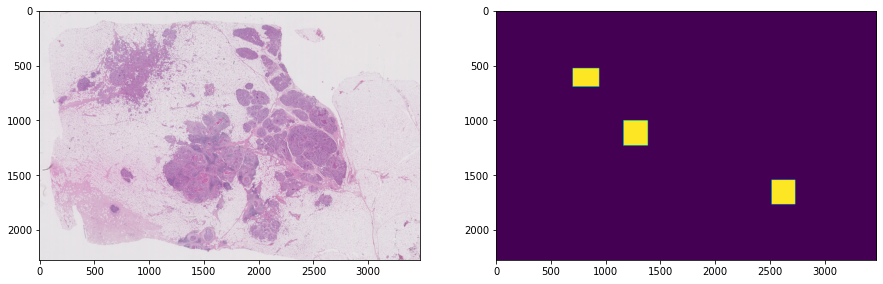

In [3]:
plot_spacing = 8.0
downsampling = image.get_downsampling_from_spacing(plot_spacing)

slide = image.get_slide(plot_spacing)
rois = roi_mask.get_slide(plot_spacing)
fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(slide)
ax[1].imshow(rois)
plt.show()

# MaskAnnotationParser

The MaskAnnotation parser converts a mask into annotations
All default values are OK for tiger data, except the shape argument which depends on your use case. The shape is the sliding windows size

In [4]:
# function to plot annotations as rects in ax
def plot_annotations_on_ax(annotations, ax, downsampling):
    for annotation in annotations:
        x,_,_,y  = np.array(annotation.bounds)/downsampling # lower-left coordinate
        width, height = np.array(annotation.size)/downsampling
        rect = patches.Rectangle((x,y), width, height, edgecolor='r', facecolor="none")
        ax[0].add_patch(rect)

In [5]:
parser = MaskAnnotationParser(shape=[256, 256])
annotations = parser.parse('/input/images/104S-rois.tif')
# number of patches
print('number of patches found covering the mask:', len(annotations))
# all patches have shape 256, 256
print('patch sizes', set([annotation.size for annotation in annotations]))

number of patches found covering the mask: 642
patch sizes {(256, 256)}


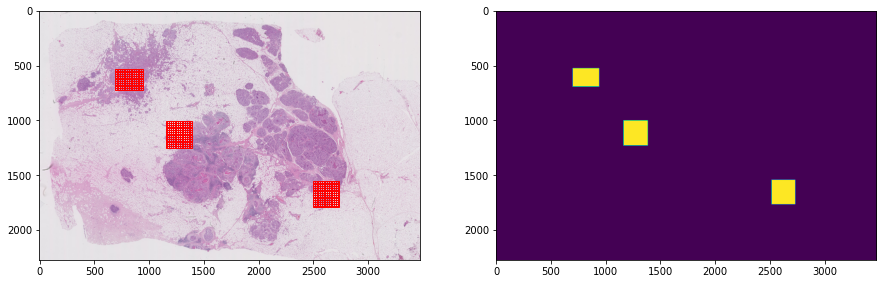

In [6]:
# plot data
fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(slide)
plot_annotations_on_ax(annotations, ax, downsampling)
ax[1].imshow(rois)
plt.show()

# Using sliding window with overlap in batch iterator:

In [7]:
mode='test'
with create_batch_iterator(mode=mode,
                           user_config='./slidingwindowconfig.yml',
                           presets=('folders',),
                           cpus=1, 
                           number_of_batches=-1, 
                           return_info=True) as test_iterator:

    print('number of annotations', len(test_iterator))

    for x_batch, y_batch, info in tqdm(test_iterator):
        for idx, (x_sample, y_sample) in enumerate(zip(x_batch, y_batch)):
            point = info['sample_references'][idx]['point']
            print('idx', idx, 'x_shape', x_sample.shape, 'mask_shape', y_sample.shape,  point)

number of annotations 642


  0%|          | 0/642 [00:00<?, ?it/s]

idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (11136 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (11392 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (11648 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (11904 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (12160 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (12416 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (12672 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (12928 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (13184 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (13440 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (13696 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (13952 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (14208 8320)
idx 0 x_shape (512, 512, 3) mask_shape (512, 512) POINT (14464 8320)
idx 0 x_shape (512, 512, 3) mask_s